#Laporan Studi Kasus EDA Kelompok H

Anggota Kelompok:
1. Sitesh Suresh Bhojwani (1906354085)
2. Mohammad Lanang Syeikha (1906304263)
3. Amanda Sarah Ivana 1906375814
4. Hana Adzania Nufaisah 1906377776

# Data Processing

In [ ]:
### Import The Library ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### Loading Data: ###

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')    
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

--2022-09-23 08:28:51--  https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63832 (62K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  62.34K  --.-KB/s    in 0.01s   

2022-09-23 08:28:51 (5.16 MB/s) - ‘data/jakarta.csv’ saved [63832/63832]

--2022-09-23 08:28:51--  https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43191

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

Ingin dilihat cuplikan data dan tipe variabel pada data untuk mempermudah *data understanding*

In [ ]:
print(dfJ.info())
display(dfJ.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   121 non-null    object 
 1   LT           121 non-null    float64
 2   LB           121 non-null    float64
 3   KT           121 non-null    float64
 4   KM           121 non-null    float64
 5   garasi       44 non-null     float64
 6   carport      90 non-null     float64
 7   lokasi       121 non-null    object 
 8   sertifikat   119 non-null    object 
 9   listrik      120 non-null    float64
 10  hadap        36 non-null     object 
 11  harga        121 non-null    float64
 12  URL          121 non-null    object 
 13  deskripsi    112 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(dfD.info())
display(dfD.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   119 non-null    object 
 1   LT           120 non-null    object 
 2   LB           118 non-null    float64
 3   KT           118 non-null    float64
 4   KM           118 non-null    float64
 5   garasi       25 non-null     float64
 6   carport      94 non-null     float64
 7   lokasi       118 non-null    object 
 8   sertifikat   118 non-null    object 
 9   listrik      103 non-null    float64
 10  hadap        62 non-null     object 
 11  harga        118 non-null    float64
 12  URL          118 non-null    object 
 13  deskripsi    118 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(dfB.info())
display(dfB.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   193 non-null    object 
 1   LT           193 non-null    float64
 2   LB           193 non-null    float64
 3   KT           193 non-null    float64
 4   KM           193 non-null    float64
 5   garasi       193 non-null    float64
 6   carport      193 non-null    float64
 7   lokasi       193 non-null    object 
 8   sertifikat   193 non-null    object 
 9   listrik      193 non-null    float64
 10  hadap        19 non-null     object 
 11  harga        193 non-null    float64
 12  URL          193 non-null    object 
 13  deskripsi    193 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(dfT.info())
display(dfT.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   124 non-null    object 
 1   LT           124 non-null    float64
 2   LB           124 non-null    float64
 3   KT           124 non-null    float64
 4   KM           124 non-null    float64
 5   garasi       38 non-null     float64
 6   carport      92 non-null     float64
 7   lokasi       124 non-null    object 
 8   sertifikat   122 non-null    object 
 9   listrik      111 non-null    float64
 10  hadap        49 non-null     object 
 11  harga        124 non-null    float64
 12  URL          124 non-null    object 
 13  deskripsi    124 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(dfX.info())
display(dfX.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   107 non-null    object 
 1   LT           107 non-null    float64
 2   LB           107 non-null    float64
 3   KT           107 non-null    float64
 4   KM           106 non-null    float64
 5   garasi       33 non-null     float64
 6   carport      81 non-null     float64
 7   lokasi       107 non-null    object 
 8   sertifikat   106 non-null    object 
 9   listrik      101 non-null    float64
 10  hadap        48 non-null     object 
 11  harga        107 non-null    float64
 12  URL          107 non-null    object 
 13  deskripsi    107 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
frames = [dfJ, dfD, dfB, dfT, dfX]
result = pd.concat(frames, keys=["Jakarta", "Depok", "Bogor", "Tangerang", "Bekasi"])
result = result.iloc[:, :14] # Hapus kolom unnamed 14 hingga unnamed 25
result.rename(columns={'LT': 'Luas_Tanah', 'LB': 'Luas_Bangunan', 'KT': 'Jumlah_Kamar_Tidur', 'KM': 'Jumlah_Kamar_Mandi'}, inplace=True) # Ganti nama kolom biar lebih mudah dipahami
result.drop(columns=['hadap', 'garasi'], inplace=True) # drop kolom hadap dan garasi karena jumlah MV di kolom hadap dan garasi yang kolom lainnya tidak missing lebih besar dari 50%

result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4141 entries, ('Jakarta', 0) to ('Bekasi', 991)
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          664 non-null    object 
 1   Luas_Tanah          665 non-null    object 
 2   Luas_Bangunan       663 non-null    float64
 3   Jumlah_Kamar_Tidur  663 non-null    float64
 4   Jumlah_Kamar_Mandi  662 non-null    float64
 5   carport             550 non-null    float64
 6   lokasi              663 non-null    object 
 7   sertifikat          658 non-null    object 
 8   listrik             628 non-null    float64
 9   harga               663 non-null    float64
 10  URL                 663 non-null    object 
 11  deskripsi           654 non-null    object 
dtypes: float64(6), object(6)
memory usage: 440.7+ KB


Akan dilakukan penggabungan data, dikarenakan dari info dataset yang ditelaah, ditemukan kesamaan-kesamaan dalam variabel yang diteliti sehingga dapat digabung untuk mempermudah komputasi

In [ ]:
### Drop semua baris yang semua kolomnya MV ###

result.dropna(how='all', inplace=True)

Menghapus seluruh kolom dan baris yang hanya terdiri dari Missing Value, karena data tersebut tidak diperlukan dan dapat memengaruhi hasil komputasi

In [ ]:
### Hapus baris pada kolom 'Luas_Tanah' yang mengandung teks ###

result = result[~result['Luas_Tanah'].isin(['- lokasi yang kami gunakan hanya per kecamatan', '-harga yang kami gunakan adalah per satuan juta'])]

Pada kolom Luas_Tanah memerlukan input data berupa data numerik yang menunjukkan besar luas tanah tersebut, sehingga data pada kolom tersebut yang berupa teks merupakan data yang invalid (noise) dan akan dihapus

In [ ]:
### Imputasi kolom carport dengan value 'Not provided by the seller' ###

result.loc[result['carport'].isna(), 'carport'] = 'Not provided by the seller'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
### Reset index yang mengandung nama lokasi dan rename menjadi 'asal_lokasi' ###

result.reset_index(level=0, inplace=True)
result.rename(columns={'level_0': 'asal_lokasi'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
### Mengubah tipe kolom yang belum sesuai ###

result['asal_lokasi'] = result['asal_lokasi'].astype('category')
result['Luas_Tanah'] = result['Luas_Tanah'].astype('float64')
result['carport'] = result['carport'].astype('category')
result['sertifikat'] = result['sertifikat'].astype('category')
result['Jumlah_Kamar_Tidur'] = result['Jumlah_Kamar_Tidur'].astype('category')
result['Jumlah_Kamar_Mandi'] = result['Jumlah_Kamar_Mandi'].astype('category')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Mengubah tipe data kolom agar dapat dilakukan komputasi

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 106
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   asal_lokasi         663 non-null    category
 1   created_at          663 non-null    object  
 2   Luas_Tanah          663 non-null    float64 
 3   Luas_Bangunan       663 non-null    float64 
 4   Jumlah_Kamar_Tidur  663 non-null    category
 5   Jumlah_Kamar_Mandi  662 non-null    category
 6   carport             663 non-null    category
 7   lokasi              663 non-null    object  
 8   sertifikat          658 non-null    category
 9   listrik             628 non-null    float64 
 10  harga               663 non-null    float64 
 11  URL                 663 non-null    object  
 12  deskripsi           654 non-null    object  
dtypes: category(5), float64(4), object(4)
memory usage: 51.5+ KB


mengecek kembali kesesuaian tipe data yang sudah diubah

In [ ]:
result.groupby('asal_lokasi').agg({'asal_lokasi': 'count', 'harga': 'median'})

,asal_lokasi,harga
asal_lokasi,,
Bekasi,107,9.200000e+08
Bogor,193,6.700000e+08
Depok,118,8.100000e+02
Jakarta,121,3.400000e+09
Tangerang,124,1.950000e+03


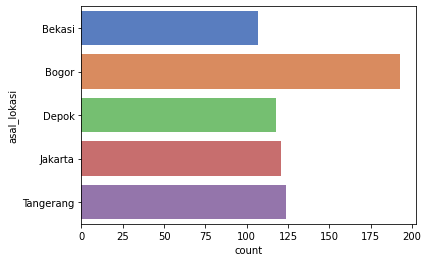

In [ ]:
ax = sns.countplot(y = 'asal_lokasi', palette = 'muted', data=result)

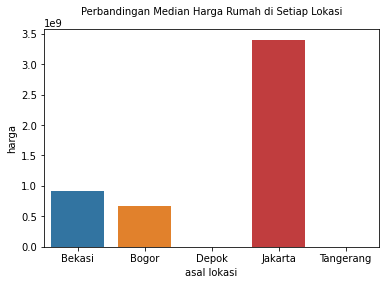

In [ ]:
df_no_3 = result.groupby('asal_lokasi').agg({'harga': 'median'}).reset_index()

sns.barplot(data=df_no_3, x='asal_lokasi', y='harga')

plt.title('Perbandingan Median Harga Rumah di Setiap Lokasi', y=1.04, fontsize=10)
plt.xlabel('asal lokasi')

plt.show()


# Interpretasi

1. Kualitas data yang dimiliki perusahaan

a. Dataframe masih terdiri dari kumpulan tabel yang perlu di 
gabungkan/merge terlebih dahulu
b. Data masih banyak terdiri dari kolom dan baris yang tidak diperlukan (nb : isi kolom dan baris hanya berupa missing value)
c. Beberapa nama kolom kurang mudah dimengerti dikarenakan menggunakan singkatan
d. Terdapat noise pada data, seperti dalam kolom variabel garasi ada nilai minus, sedangkan, definisi variabel garasi pada data yaitu  jumlah kapasitas garasi di properti yang ditawarkan. Sehingga, noise tersebut harus dihilangkan 
e. Terdapat kolom variabel "Hadap" yang memiliki missing value > 50%, sehingga perlu dihapus 
f. Terdapat beberapa variabel yang jenis/tipe variabelnya tidak sesuai



2. Apakah ada saran perbaikan ke DE/DBA


a. Sebaiknya data sudah di merge terlebih dahulu karena hal tersebut dapat memudahkan dalam mengolah data. Hal ini akan memudahkan tim data science karena kita dapat melakukan filtering sendiri apabila data itu sudah digabung. Namun, jika datanya belum di gabung, maka kita harus menggabungkannya tersebut dahulu.

b. Sebaiknya, nama kolom yang diberikan pada data tidak menggunakan singkatan. Sehingga, dapat mempermudah pemahaman nama kolom/variabel pada data

c. Untuk dapat mendapatkan data yang lebih informatif, dalam rangka menunjang kemajuan perusahaan. Sebaiknya data jarak rumah ke rumah sakit, pasar tradisional, mini market, dan sekolah terdekat menjadi pertimbangan. Hal ini karena 4 hal tersebut sangat erat kaitannya dengan kehidupan sehari-hari kita. Data-data tersebut dapat pula memberikan insight yang baik untuk perusahaan kedepannya.

d. Untuk menghindari munculnya noise ataupun missing value pada data, ada baiknya untuk memastikan instrumen pengukuran baik terlebih dahulu sebelum mengambil data dipertimbangkan dan  ketika menginput data ada baiknya untuk memepertimbangkan dipastiaknnya terlebih dahulu setiap variabel tersebut mudah dimengerti.


3.dengan melihat nilai median harga rumah di masing-masing kota ada kecenderungan rumah di suatu kota lebih mahal atau murah dibandingkan dengan kota lain?

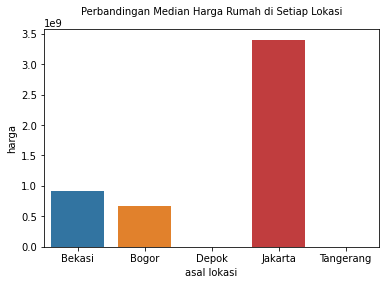dapat dilihat jakarta lebih memiliki nilai median harga rumah paling tinggi dibandingkan kota lainnya

4. 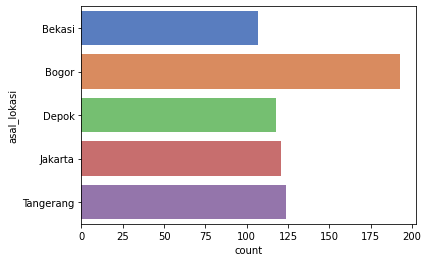

Kota dengan penjualan terbesar adalah bogor. Kita tahu bahwa setiap penjualan rumah agen akan mendapatkan bagi hasi dari setiap penjualaannya sehingga sebaiknya dibuka di bogor